<font size = 4>K-means算法的基本过程：首先是K-means算法在聚类的过程中也是要用到欧几里得距离来计算点与点之间的距离。但是做为无监督学习的聚类算法，该算法还是有很多特殊之处。
    
K-means的代价函数为$J = \sum_{k=1}^K\sum_{i \in C_k}\mid\mid x_i - \mu_k \mid\mid^2$ 
    
这个代价函数的求得是K个类中每个类中点和聚类中心点之间距离的平方的和
    
该算法的基本思想为：
    
1、首先随机选取K个实例最为初始值，这k个值就相当于K个聚类的中心。（K值的选择决定了想要聚成几类）

2、计算每个实例（样本点）到初始选择的K个点的距离，和哪个点之间的距离最小，就将对应的实例归为哪一类，最终就会将所有点归为K类
    
3、根据聚的K个类，我们重新计算每个类的均值（举例来说：如果是xy平面直角坐标系下的聚类，我们就将计算x和y的平均值，之后将得到的$\bar{x}$和$\bar{y}$，我们将其做为新的聚类中心）
    
4、我们将重新计算所有样本点到新的聚类中心的距离，然后更新聚类
    
5、之后就是重复以上过程，直到达到我们的聚类标准后就停止聚类。通常情况下这个标准是当前代价函数值和后续迭代代价函数值之间差值的阈值，或者是当前图心位置和后续迭代图心位置变化的阈值。如果这些停止标准足够小，K-means就会收敛到一个最优值。需要注意的一个重点是，无论停止标准的值如何设置，K-means算法并不一定能收敛到全局最优值。
 </font>

<font size = 4>由于K-means算法初始选择聚类中心的时候是随机选择的，因此很可能会出现聚类到最后会出现局部最优解，而不是接近于全局最优解，因此在算法实现过程中，算法会重复几十次到上百次，在每次迭代的过程中会选择不同的初始聚类中心，这样就可以通过对比将代价函数能收敛到最小值的那次做为初始化的聚类中心</font>

<font size = 4>由于在实际问题中K的值往往不会给出，因此需要我们自行选额这个超参数。这就带来一个问题该如何选择K值。

这里给出一个方法：**肘部方法**。肘部方法使用不同的k值绘制出代价函数的值。随着K值得增加，平均偏差也会增加，每个聚类将包含更少的实例，同时实例也将更靠近各自对应的聚类中心。然而随着K值的增加，对平均偏差的提升也将会减少。偏差的提升变化下降最陡时的K值称为肘部
</font>

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [25]:
c1x = np.random.uniform(0.5, 1.5, (1, 10))
c1y = np.random.uniform(0.5, 1.5, (1, 10))
c2x = np.random.uniform(3.5, 4.5, (1, 10))
c2y = np.random.uniform(3.5, 4.5, (1, 10))

# 这里用到了numpy中矩阵的一些操作，这些操作非常重要
x = np.hstack((c1x, c2x))
y = np.hstack((c1y, c2y))
X = np.vstack((x, y)).T


Text(0, 0.5, 'Average Dispersion')

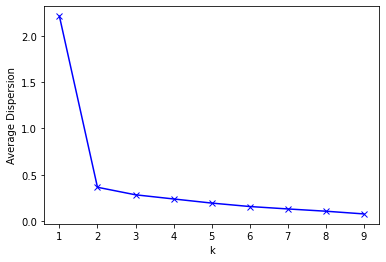

In [26]:
K = range(1, 10)
meanDispersions = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    meanDispersions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis = 1)) / X.shape[0])
    
plt.plot(K, meanDispersions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')


# 评估聚类

<font size = 4>聚类的另一种衡量方式，称为轮廓系数。轮廓系数是对聚类紧密程度和稀疏程度的衡量。当聚类的质量上升时轮廓稀系数上升。当聚类内部很紧密且彼此之间距离很远时，轮廓系数很大；而对于体积很大且相互重叠的聚类，轮廓系数很小。轮廓系数在每个实例上计算，对于一个实例集合，轮廓系数等于实例轮廓系数的平均值。$$ s = \frac {ba}{max(a,b)}$$ 在公式中，a是聚类中实例之间的平均距离。b是聚类的实例和最接近的聚类的实例之间的平均距离</font>

In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

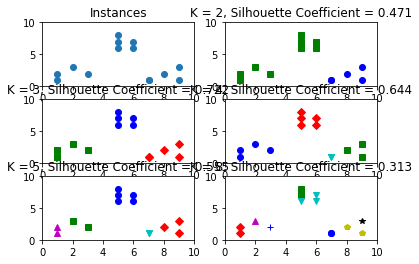

In [40]:
plt.subplot(3, 2, 1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)


plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters = t).fit(X)
    
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color = colors[l], marker = markers[l], ls = 'None')
    
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title('K = %s, Silhouette Coefficient = %.03f' % (t, metrics.silhouette_score(X, kmeans_model.labels_, metric = 'euclidean')))
plt.show()